# Distribuiçao de dados unidimensionais

Quando temos apenas um vetor de dados temos uma distribuição unidimensional de frequencias. Em outras palavras, "A coleção de informações sobre limites de classe e freqüência relativa ou absoluta constituem a distribuição de freqüência. Para uma variável simples (por exemplo, altura) tem-se uma distribuição de freqüência unidimensional." 
<p>https://wikis.hu-berlin.de/mmint/Basics:_One-Dimensional_Distribution/pt</p>

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

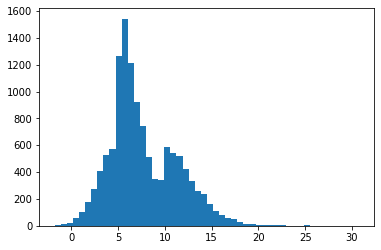

In [13]:
data = np.loadtxt("dataset.txt")
plt.hist(data, bins=50);

Vemos que essa distrbuição de frequencias apresenta um certo padrão, parece um sino. Podemos então medir a largura, altura(quão centralizado e balanceado ela é), e talvez uma ou outra coisa a mais delas, em outras palavras a centralidade.

# Medidas de centralidade

### Media

Se temos um conjunto de N pontos denotado por $x_i$, a média é definida por

$$ \frac{1}{N} \sum_{i=1}^N x_i $$

A média pode ser calculada da seguinte forma:

In [3]:
def get_mean(xs):
    summed = 0
    for x in xs:
        summed += x
    return summed / len(xs)
print(get_mean([3, 5, 2, 6]))

4.0


Óbvio que temos funções no numpy e pandas que já trazem isso mas é bom saber como implementar eles

In [14]:
#np.mean ou np.average 

In [4]:
mean = np.mean(data)
print(mean, data.mean(), np.average(data))

7.68805056 7.68805056 7.68805056


### Mediana

É o valor que fica exatamente no meio da sua distribuição , separa os 50% de cima dos 50% debaixo. Por exemplo, `[1,3,5,7,7]` a mediana é  `5`. A media é caluclada da seguinte forma

In [5]:
def get_median(xs):
    mid = len(xs) // 2
    if len(xs) % 2 == 1:
        return sorted(xs)[mid]
    else:
        return 0.5 * np.sum(sorted(xs)[mid - 1:mid + 1])
print(get_median([7, 7, 3, 1, 5]))
print(get_median([7, 7, 3, 1, 4, 5]))
# 1 1 4 5 7 7

5
4.5


#### Bem legal , não é? Mas quando devemos usar a media e quando devemos usar a mediana?

In [6]:
median = np.median(data)
print(median)

6.7325


Outliers! 

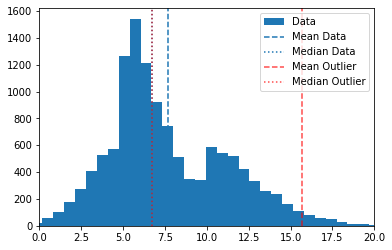

In [15]:
outlier = np.insert(data, 0, 10000)
plt.hist(data, label="Data", bins=50);
plt.axvline(np.mean(data), ls="--", label="Mean Data")
plt.axvline(np.median(data), ls=":", label="Median Data")
plt.axvline(np.mean(outlier), c='r', ls="--", label="Mean Outlier", alpha=0.7)
plt.axvline(np.median(outlier), c='r', ls=":", label="Median Outlier", alpha=0.7)
plt.legend()
plt.xlim(0,20);

### Moda

Algo muito legal pra quando temos outliers, é o valor mais frequente de uma disribuição. **Funciona bem para valores discretos.** Se tiver um distribuição contínua , discrize-a.
A moda de `[1,7,2,5,3,3,8,3,2]` é `3`. 

Essa é a maneira de calucar a moda.

In [17]:
def get_mode(xs):
    counts = {}
    for value in xs:
        values, counts = np.unique(xs, return_counts=True)
        max_count_index = np.argmax(counts)
    return values[max_count_index]
    
print(get_mode([1,7,7,2,5,3,3,8,7,3,3,7,2]))

3


In [19]:
def get_mode(xs):
    counts = {}
    for value in xs:
        counts[value] = counts.get(value, 0) + 1
#     values, counts = np.unique(xs, return_counts=True)
#     max_count_index = np.argmax(counts)
    return max(counts, key=counts.get)
    
print(get_mode([1,7,7,2,5,3,3,8,7,3,7,3,2]))

7


### Mas e se tivermos duas chaves com o mesmo valor de máximo? Como faremos?

In [20]:
def get_mode(xs):
    counts = {}
    for value in xs:
        counts[value] = counts.get(value, 0) + 1
    maxValue = max(counts.values())
   
    return [k for k, v in counts.items() if v == maxValue]
    
print(get_mode([1,7,7,2,5,3,3,8,7,3,7,3,2]))

[7, 3]


In [21]:
get_mode(data)

[5.519]

Temos muitos valores vamos agrupar eles em bins

In [22]:
hist, edges = np.histogram(data, bins=100)
edge_centers = 0.5 * (edges[1:] + edges[:-1])
mode = edge_centers[hist.argmax()]
print(mode)

5.223165


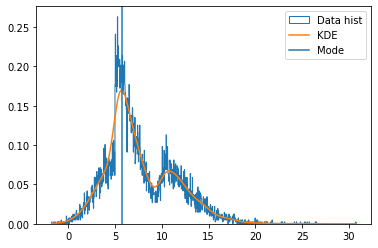

In [23]:
kde = st.gaussian_kde(data)
xvals = np.linspace(data.min(), data.max(), 1000)
yvals = kde(xvals)
mode = xvals[yvals.argmax()]
plt.hist(data, bins=1000, density=True, label="Data hist", histtype="step")
plt.plot(xvals, yvals, label="KDE")
plt.axvline(mode, label="Mode")
plt.legend();

# Comparação 

Uma comparação básica entre media, moda e mediana:

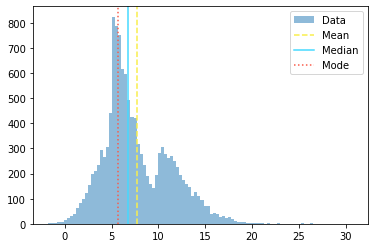

In [24]:
plt.hist(data, bins=100, label="Data", alpha=0.5)
plt.axvline(mean, label="Mean", ls="--", c='#f9ee4a')
plt.axvline(median, label="Median", ls="-", c='#44d9ff')
plt.axvline(mode, label="Mode", ls=":", c='#f95b4a')
plt.legend();

# Medidas de largura e balancemanto

* Variancia
* Desvio padrão
* Skewness
* Kurtosis

### Variancia

A variancia é uma medida de como uma distribuição se espalha em torno da média. Falando bonito, é o valor esperado do desvio quadrático da média. Que é dado pela fórmula abaixo.

$$ Var = \frac{1}{N} \sum_{i=1}^N (x_i - \mu)^2, $$

onde $\mu$ é a média do conjunto de dados $x$. Existe uma razão para dividirmos ou por $N$ ou por  $N-1$. Que veremos depois, por enquanto segue a fórmula implementada:

In [ ]:
#1/n (E[x2])

In [25]:
def get_variance(xs):
    mean = np.mean(xs)
    summed = 0
    for x in xs:
        summed += (x - mean)**2
    return summed / (len(xs) - 1)
print(get_variance([1,2,3,4,5]))

2.5


In [26]:
variance = np.var(data, ddof=1)
print(variance)

13.137626632694301


### Standard deviation

É o quadrado da variância. Podemos usar np.std, ou a implemntação que criamos acima

In [15]:
std = np.std(data)
print(std, std**2)
# variancia**2

3.6244414221454435 13.136575622563685


### Our powers combined

Welcome to the Gaussian approximation! Also known as a normal approximation. Check it out:

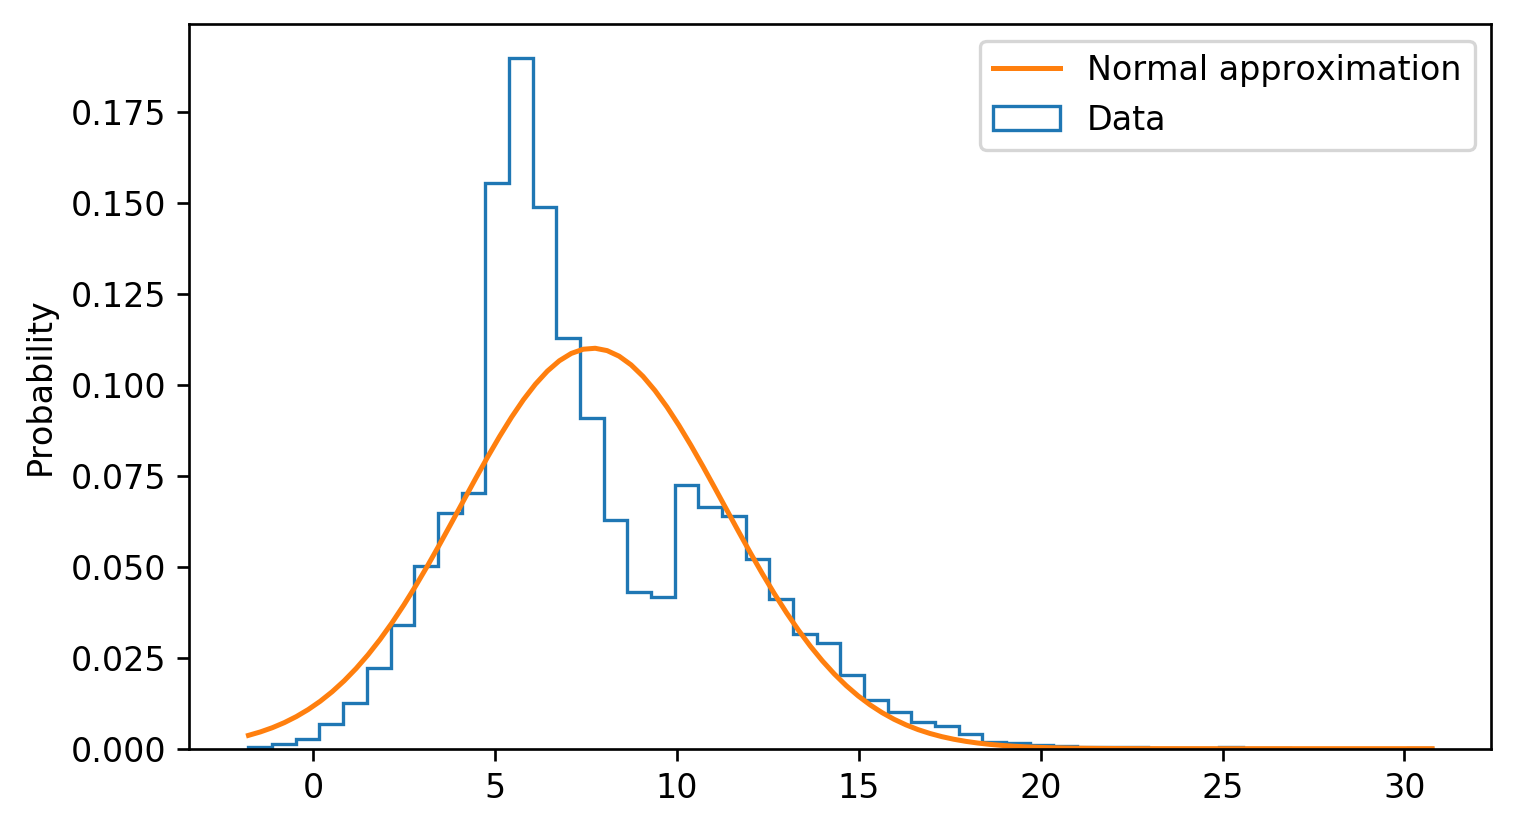

In [16]:
xs = np.linspace(data.min(), data.max(), 100)
ys = st.norm.pdf(xs, loc=mean, scale=std)

plt.hist(data, bins=50, density=True, histtype="step", label="Data")
plt.plot(xs, ys, label="Normal approximation")
plt.legend()
plt.ylabel("Probability");

Its not *too* bad, but its not the best thing either. It seems like our data isn't perfectly symmetrical, so lets quantify how asymmetrical it is.

### Skewness

In this section I might drop the word "moment" a few times. There are some standardised ways of quantifying "moments". The first moment is zero by definition. The second is variance. The third is skewness, which is often defined as $\gamma_1$.

$$ \gamma_1 = \frac{\kappa_3}{\kappa_2^{3/2}} = \frac{E[(x-\mu)^3]}{E[(x-\mu)^2]^{3/2}} $$


É uma assimetria que desvia para um lado de uma distrbuiçao normal. É positiva se a distribuição estiver mais acentuada a direita da cauda.

In [17]:
def get_skewness(xs):
    mean = np.mean(xs)
    var = np.var(xs)
    summed = 0
    for x in xs:
        summed += (x - mean)**3
    return (summed / (len(xs))) / (var ** 1.5)
print(get_skewness([1,2,3,4,5]))

0.0


In [18]:
skewness = st.skew(data)
print(skewness, get_skewness(data))

0.7408773663373577 0.7408773663373582


Let's update our normal approximation to a skewed normal approximation and see how it looks, just for fun.

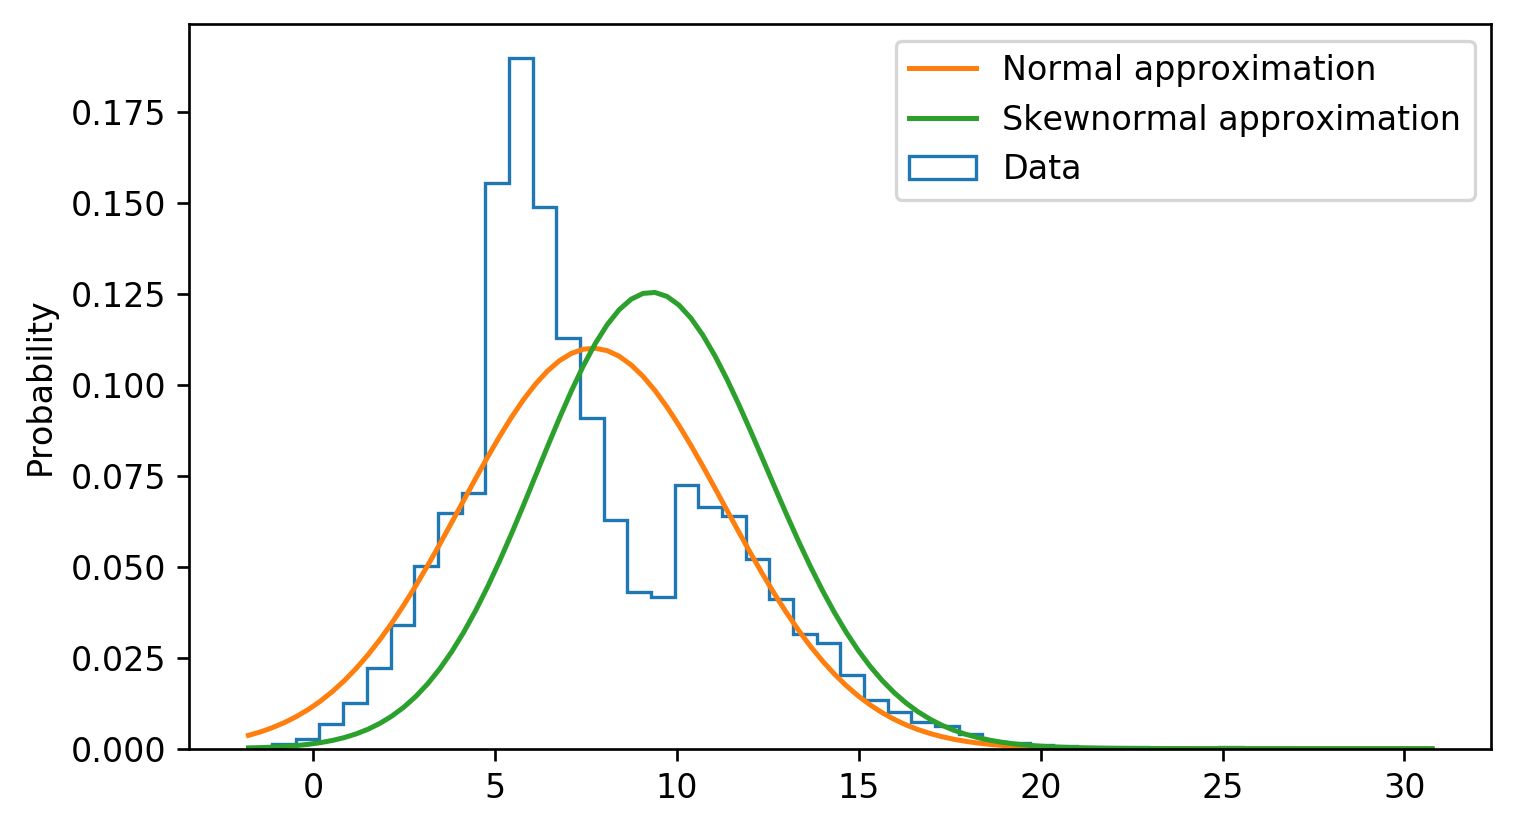

In [19]:
xs = np.linspace(data.min(), data.max(), 100)
ys1 = st.norm.pdf(xs, loc=mean, scale=std)
ys2 = st.skewnorm.pdf(xs, skewness, loc=mean, scale=std)

plt.hist(data, bins=50, density=True, histtype="step", label="Data")
plt.plot(xs, ys1, label="Normal approximation")
plt.plot(xs, ys2, label="Skewnormal approximation")
plt.legend()
plt.ylabel("Probability");

Oh no, this doesn't look better? Where did we go wrong?

A skew normal cant just be given the mean and standard deviation of a normal and expected to work. The skewness modifies the mean and standard deviation. You need to actually fit.

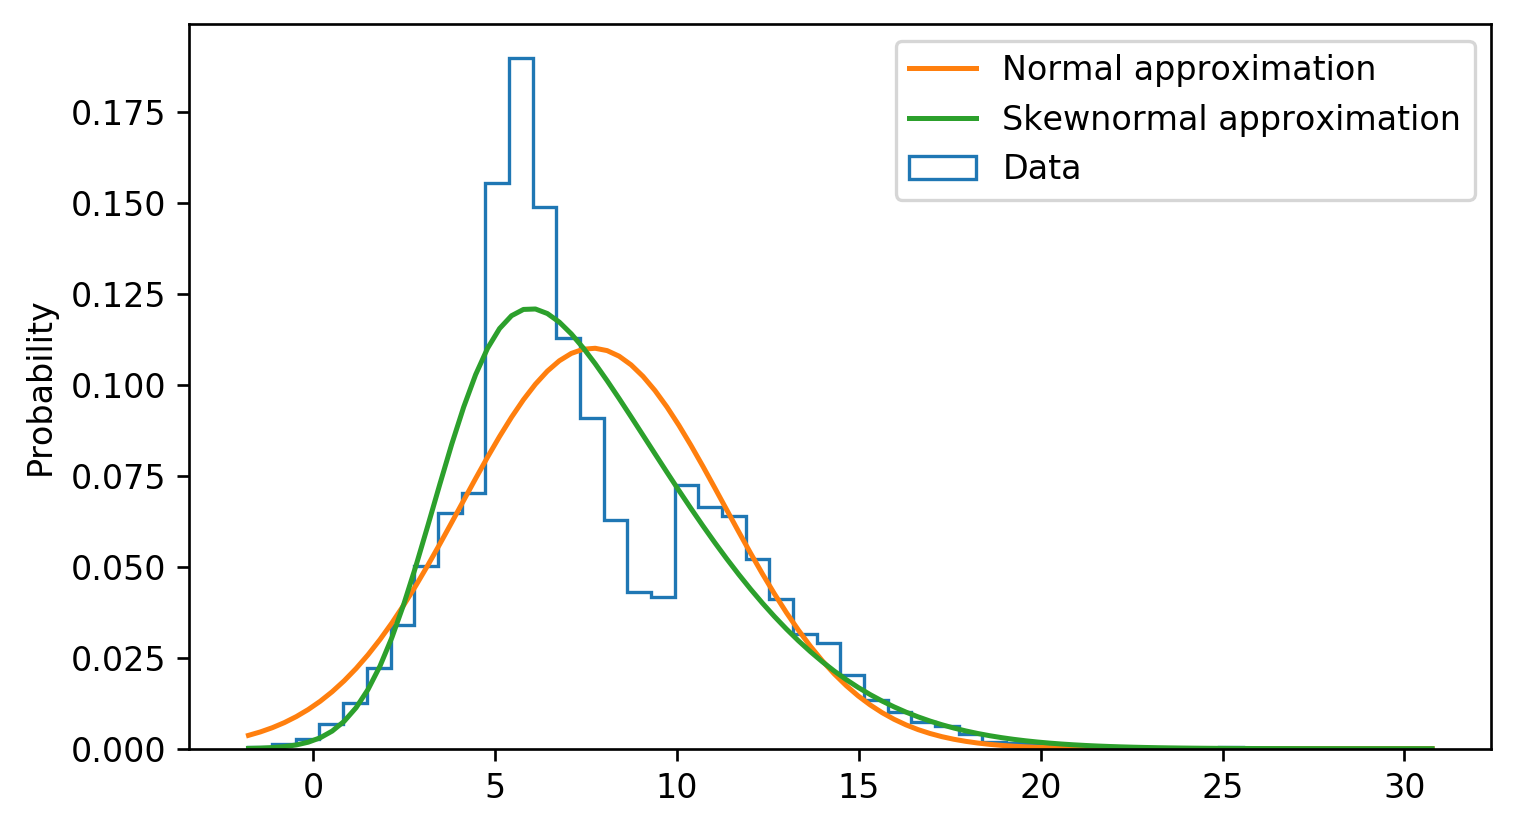

In [20]:
xs = np.linspace(data.min(), data.max(), 100)
ys1 = st.norm.pdf(xs, loc=mean, scale=std)
ps = st.skewnorm.fit(data)
ys2 = st.skewnorm.pdf(xs, *ps)

plt.hist(data, bins=50, density=True, histtype="step", label="Data")
plt.plot(xs, ys1, label="Normal approximation")
plt.plot(xs, ys2, label="Skewnormal approximation")
plt.legend()
plt.ylabel("Probability");

### Kurtosis

The next moment, and the last one we'll consider is kurtosis. It has a similar definition, and is often represented as $\kappa$ or $\gamma_2$:

$$ \kappa = \frac{E[(x-\mu)^4]}{E[(x-\mu)^2]^{4/2}} $$

Curtose indica como as caudas de uma distribuição diferem da distribuição normal. Uma com curtose zero é aquele distrbuição normal tradicional que vemos.A curtose positiva tem as caudas pesadas. A negativa tem as caudas mais leves.

In [21]:
def get_kurtosis(xs):
    mean = np.mean(xs)
    var = np.var(xs)
    summed = 0
    for x in xs:
        summed += (x - mean)**4
    return (summed / (len(xs))) / (var ** 2)
print(get_kurtosis([1,2,3,4,5]))

1.7


In [22]:
kurtosis = st.kurtosis(data, fisher=False)
print(kurtosis, get_kurtosis(data))

3.5517538497309498 3.551753849730955


`fisher` hey? So this is just a normalisation thing and because there are multiple definitions of kurtosis. With `fisher=False`, a normal distrubtion has a kurtosis of 3. With `fisher=True`, scipy subtracts 3 from the result so that a normal distribution would have a kurtosis of 0. Lots of things are compared to normal distributions, so having all the moments be 0 for them is handy. If you're curious about this, the difference is between "kurtosis" and "excess kurtosis", will help which will hopefully help when googling!

# When analytics fail

At the moment we've been coming up with ways to quantify our data distribution such that we could try and reconstruct something approximately the same using various analytic distributions, like the normal distribution. So what happens if that isn't going to be good enough?

### Percentiles

What if we - instead of using a mean or other such numbers - simply turned our long data vector down into a few points representing different percentiles? We could essentially reconstruct our data distribution to an aribtrary accuracy and never worry about analytic functions.



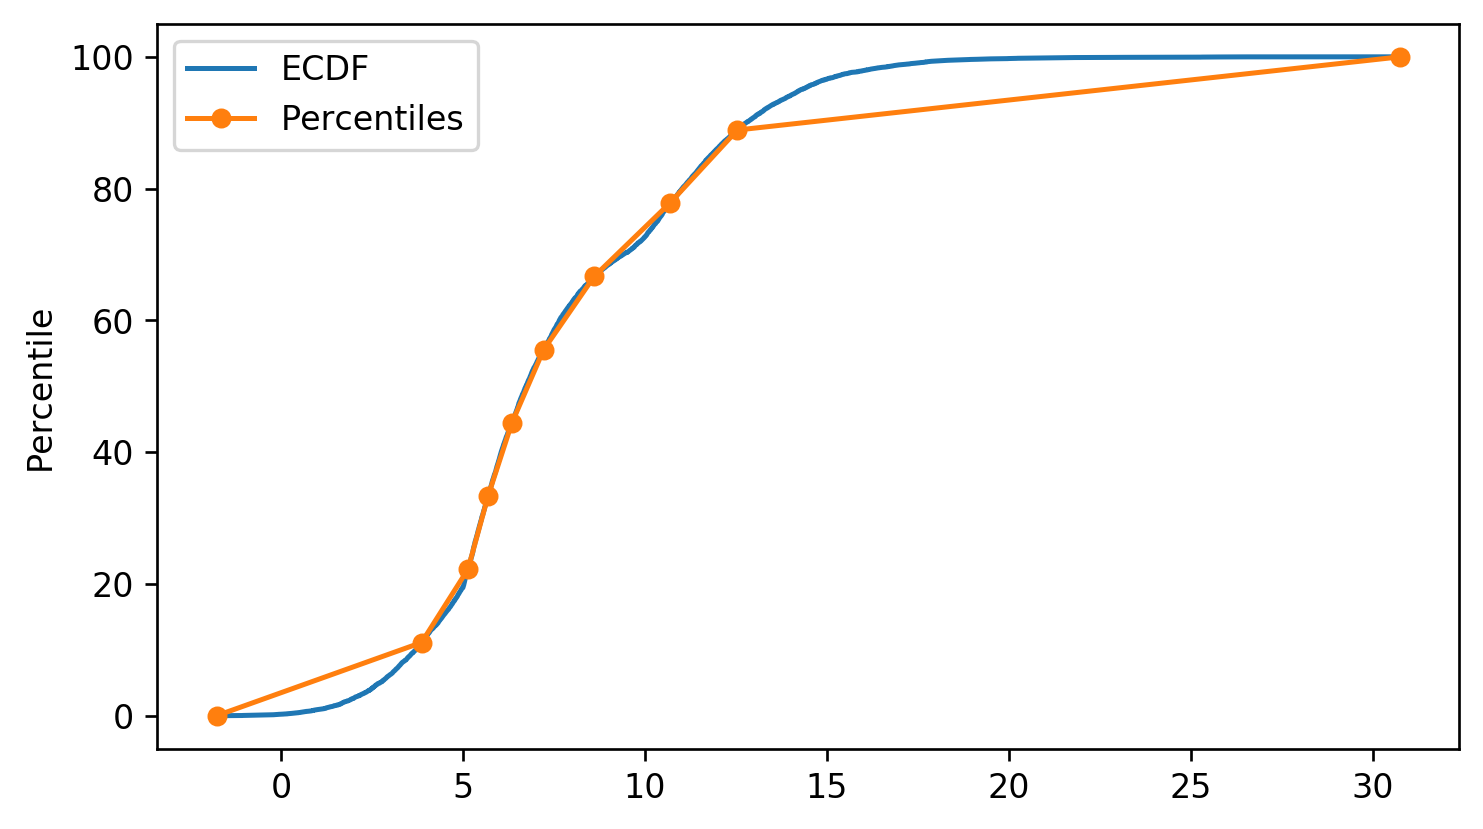

In [23]:
ps = np.linspace(0, 100, 10)
x_p = np.percentile(data, ps)

xs = np.sort(data)
ys = np.linspace(0, 1, len(data))

plt.plot(xs, ys * 100, label="ECDF")
plt.plot(x_p, ps, label="Percentiles", marker=".", ms=10)
plt.legend()
plt.ylabel("Percentile");

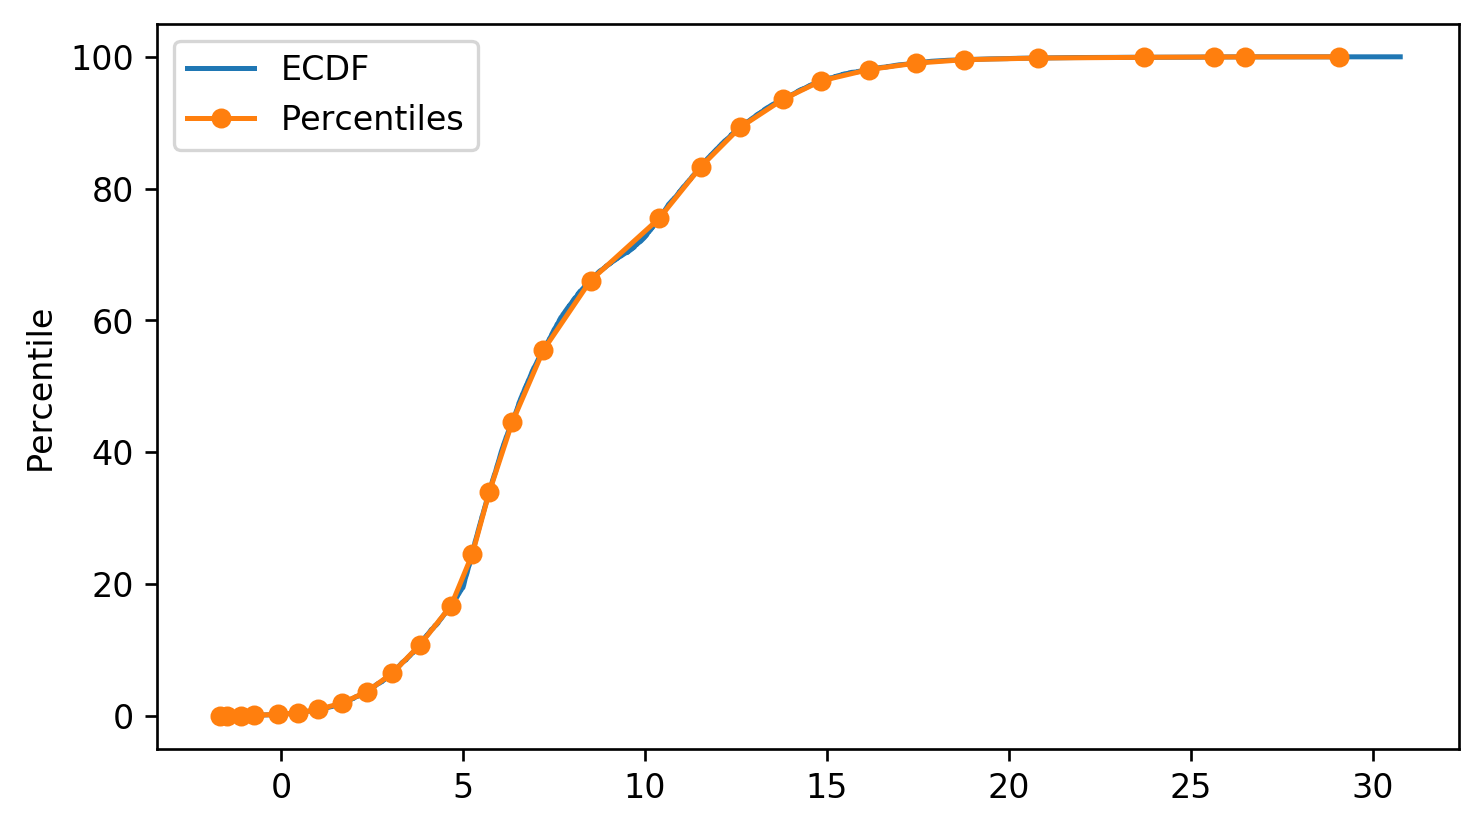

In [24]:
ps = 100 * st.norm.cdf(np.linspace(-4, 4, 30))
x_p = np.percentile(data, ps)

xs = np.sort(data)
ys = np.linspace(0, 1, len(data))

plt.plot(xs, ys * 100, label="ECDF")
plt.plot(x_p, ps, label="Percentiles", marker=".", ms=10)
plt.legend()
plt.ylabel("Percentile");

In [ ]:
[21, 19, 30, 45, 25,]

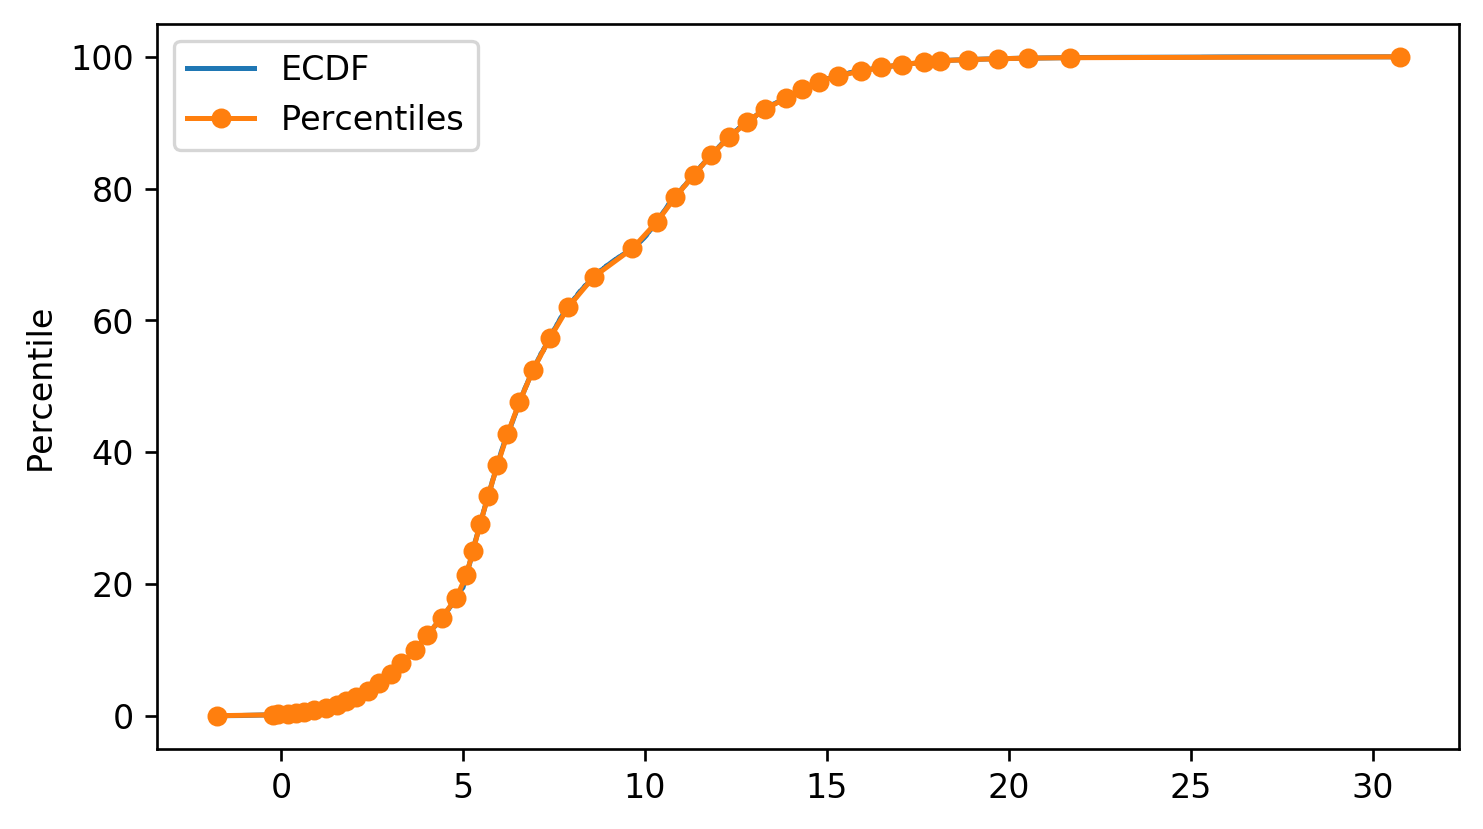

In [25]:
ps = 100 * st.norm.cdf(np.linspace(-3, 3, 50))
ps = np.concatenate(([0], ps, [100]))  # There is a bug in the insert way of doing it, this is better
x_p = np.percentile(data, ps)

xs = np.sort(data)
ys = np.linspace(0, 1, len(data))

plt.plot(xs, ys * 100, label="ECDF")
plt.plot(x_p, ps, label="Percentiles", marker=".", ms=10)
plt.legend()
plt.ylabel("Percentile");

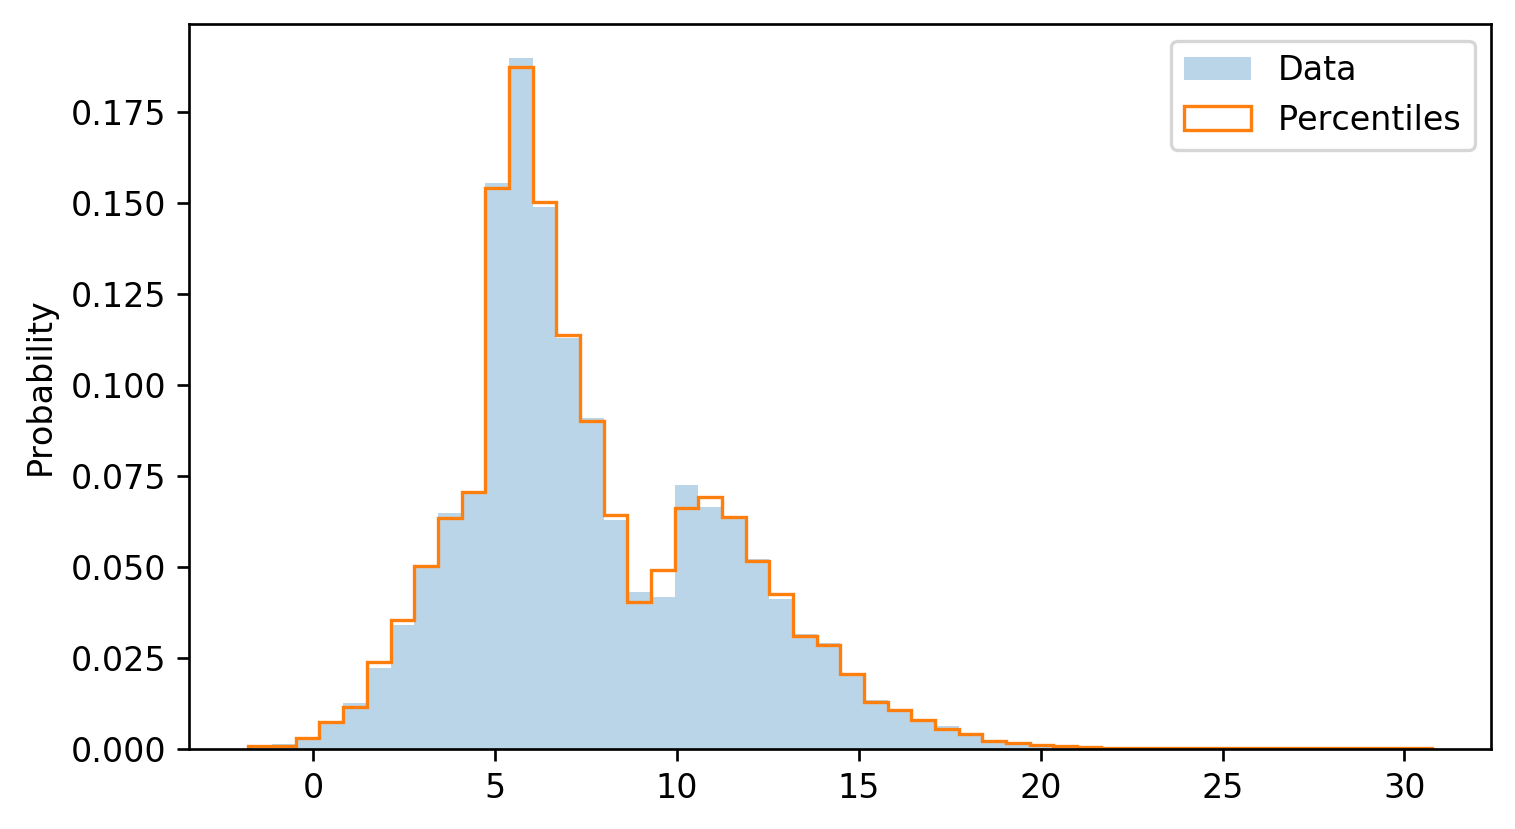

In [26]:
from scipy.interpolate import interp1d

n = int(1e6)
u = np.random.uniform(size=n)
samp_percentile_1 = interp1d(ps / 100, x_p)(u)

_, bins, _ = plt.hist(data, bins=50, density=True, alpha=0.3, label="Data")
plt.hist(samp_percentile_1, bins=bins, density=True, histtype="step", label="Percentiles")
plt.ylabel("Probability")
plt.legend();

Look at how nice those tails are now! And you can see that if we increased the number of samples in our second percentiles to around a hundred and we could very accurately describe our 1D distribution. And 100 data points are much faster to transfer than thousands of them.